# ML for Reservation Data & Correlation with Houston Census Figures

import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xlrd
import seaborn as sns

In [2]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Reading in Census Data

In [3]:
Census_Data = pd.read_csv('Census_ML_4.csv', index_col=None)

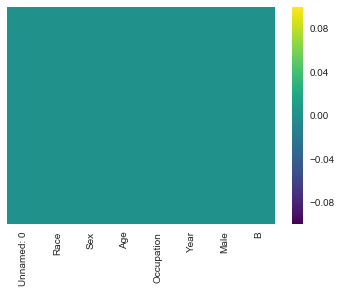

In [4]:
sns.heatmap(Census_Data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [5]:
Census_Data.head(2)

,Unnamed: 0,Race,Sex,Age,Occupation,Year,Male,B
0,0,B,F,26,Servant,1900,0,1
1,1,B,M,27,Drayman,1900,1,1


In [6]:
del Census_Data['Unnamed: 0']
del Census_Data['Occupation']
del Census_Data['Male']
del Census_Data['B']


In [7]:
Census_Data.head(2)

,Race,Sex,Age,Year
0,B,F,26,1900
1,B,M,27,1900


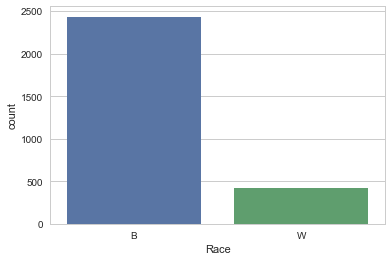

In [8]:
sns.countplot(x = 'Race',data=Census_Data)
plt.show()

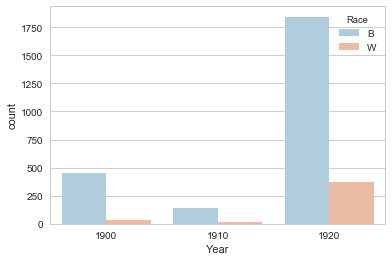

In [9]:
sns.countplot(x='Year',hue='Race',data=Census_Data,palette='RdBu_r')

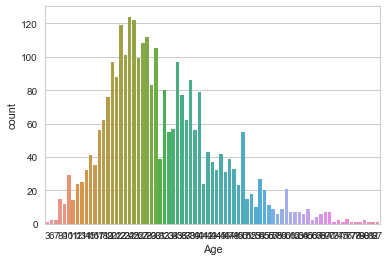

In [10]:
sns.countplot(x = 'Age',data=Census_Data)
plt.show()



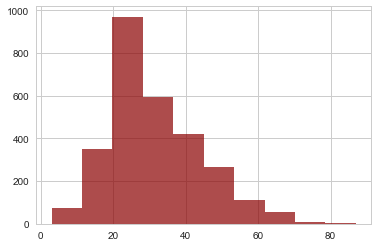

In [11]:
Census_Data['Age'].hist(bins=10,color='darkred',alpha=0.7)

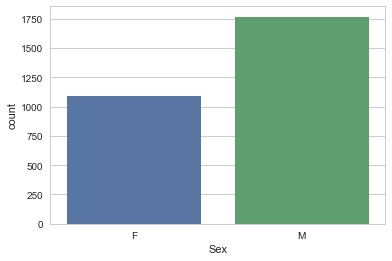

In [12]:
sns.countplot(x = 'Sex',data=Census_Data)
plt.show()

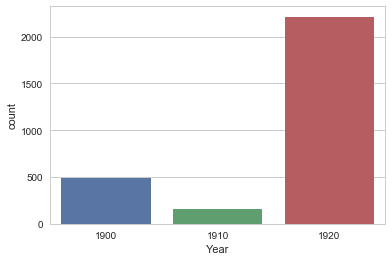

In [13]:
sns.countplot(x = 'Year',data=Census_Data)
plt.show()

In [14]:
age_ranges= [0,11,19,40,65,110]
age_labels = ['age_0-11','age_12-19','age_20-40','age_40-65','age_Above-65']
Census_Data['Age_Group'] = pd.cut(Census_Data['Age'], bins=age_ranges, labels=age_labels)

In [15]:
Census_Data.head(5)

,Race,Sex,Age,Year,Age_Group
0,B,F,26,1900,age_20-40
1,B,M,27,1900,age_20-40
2,B,F,25,1900,age_20-40
3,B,F,25,1900,age_20-40
4,B,F,8,1900,age_0-11


In [16]:
data2 = pd.get_dummies(Census_Data, columns =['Race', 'Sex', 'Year','Age_Group'])
data2.columns

Index(['Age', 'Race_B', 'Race_W', 'Sex_F', 'Sex_M', 'Year_1900', 'Year_1910',
       'Year_1920', 'Age_Group_age_0-11', 'Age_Group_age_12-19',
       'Age_Group_age_20-40', 'Age_Group_age_40-65', 'Age_Group_age_Above-65'],
      dtype='object')

In [17]:
data2.head()

,Age,Race_B,Race_W,Sex_F,Sex_M,Year_1900,Year_1910,Year_1920,Age_Group_age_0-11,Age_Group_age_12-19,Age_Group_age_20-40,Age_Group_age_40-65,Age_Group_age_Above-65
0,26,1,0,1,0,1,0,0,0,0,1,0,0
1,27,1,0,0,1,1,0,0,0,0,1,0,0
2,25,1,0,1,0,1,0,0,0,0,1,0,0
3,25,1,0,1,0,1,0,0,0,0,1,0,0
4,8,1,0,1,0,1,0,0,1,0,0,0,0


In [18]:
data2.dtypes

Age                       int64
Race_B                    uint8
Race_W                    uint8
Sex_F                     uint8
Sex_M                     uint8
Year_1900                 uint8
Year_1910                 uint8
Year_1920                 uint8
Age_Group_age_0-11        uint8
Age_Group_age_12-19       uint8
Age_Group_age_20-40       uint8
Age_Group_age_40-65       uint8
Age_Group_age_Above-65    uint8
dtype: object

In [19]:
data2 = data2.apply(pd.to_numeric, errors='ignore')
data2.dtypes

Age                       int64
Race_B                    uint8
Race_W                    uint8
Sex_F                     uint8
Sex_M                     uint8
Year_1900                 uint8
Year_1910                 uint8
Year_1920                 uint8
Age_Group_age_0-11        uint8
Age_Group_age_12-19       uint8
Age_Group_age_20-40       uint8
Age_Group_age_40-65       uint8
Age_Group_age_Above-65    uint8
dtype: object

In [20]:
data2.shape

(2854, 13)

In [21]:
#g = sns.pairplot(data2)

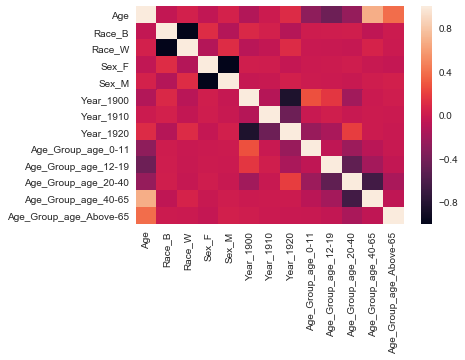

In [22]:
sns.heatmap(data2.corr())
plt.show()

In [51]:
X = data2[['Race_B', 'Sex_M', 'Sex_F', 'Year_1900', 'Age_Group_age_0-11','Age_Group_age_12-19',
       'Age_Group_age_20-40', 'Age_Group_age_40-65', 'Age_Group_age_Above-65']]

# X = data2[['Race_B', 'Sex_M', 'Sex_F', 'Year_1900', 'Year_1910',
#        'Year_1920', 'Age_Group_age_0-11', 'Age_Group_age_12-19',
#        'Age_Group_age_20-40', 'Age_Group_age_40-65', 'Age_Group_age_Above-65']]

y = data2['Race_W'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
X_train.shape

(2140, 8)

In [25]:
X_test.shape

(714, 8)

In [26]:
y_train.shape

(2140, 1)

## Scale or Normalize the data

In [27]:
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

# X_train = X_scaler.transform(X_train)
# X_test = X_scaler.transform(X_test)
# y_train = y_scaler.transform(y_train)
# y_test = y_scaler.transform(y_test)

## Logistic Regression Model

In [52]:
classifier = LogisticRegression()
#classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[619   0]
 [  0  95]]


## Accuracy

In [47]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Training Data Score: 0.9957943925233644
Testing Data Score: 0.9929971988795518


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       686
           1       1.00      0.79      0.88        28

   micro avg       0.99      0.99      0.99       714
   macro avg       1.00      0.89      0.94       714
weighted avg       0.99      0.99      0.99       714



## Classifier visualization

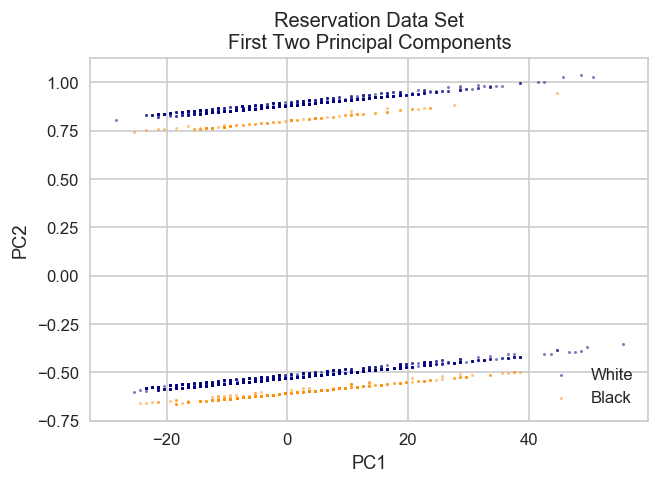

In [32]:
from sklearn.decomposition import PCA
X = data2[['Age', 'Race_B', 'Sex_F', 'Sex_M', 'Year_1900', 'Year_1910']]
y = data2['Race_W']
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='White', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Black', s=2, color='darkorange')
plt.legend()
plt.title('Reservation Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.gca().set_aspect('equal')
plt.show()

##  Feature Selection

In [33]:
X = data2[['Age', 'Race_W', 'Sex_F', 'Sex_M', 'Year_1900', 'Year_1910','Year_1920']]
y = data2['Race_B']

In [34]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(X, y )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]


In [35]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result = logit_model.fit()
#print(result.summary())

PerfectSeparationError: Perfect separation detected, results not available

In [ ]:
logit_model